In [1]:
# Loading the libraries
import numpy as np
# numpy stands for numerical python
import pandas as pd
# pandas stands for panel data
import matplotlib.pyplot as plt
#matplot lib stands for matlab plot libray

In [2]:
#read the data file
dataset = pd.read_csv("Churn_Modelling.csv")
# Check if the data is properly loaded

In [3]:
X = dataset.iloc[:,3:13].values
type(X)

numpy.ndarray

In [4]:
y = dataset.iloc[:,13].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [5]:
# importing the relevant libraries from sklearn preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# pass on the functionalities of the library LabelEncoder to another variable which is easier to use as proceed
labelencoder = LabelEncoder()
# Now we have to do the labelencoding for gender
# FIT_TRANSFORM() splits the label encoder function on to the selected column which in this case happens to be gender
# label encoder will convert male/female to 1 and 0
# No need for one hot encoding since gneder is binary
# If category is more than binary then label encoder is needed
X[:,2] = labelencoder.fit_transform(X[:,2])
X
# NEXT STEP IS to label encode the geography
X[:,1] = labelencoder.fit_transform(X[:,1])
X
# To do one hot encoding it was esier in the olden days. Now we have to use a new fucntion created by developers called Column Transfer. This function is a tuple and have
# 3 arguments
#ColumnTransfer(name, object, column number)
# get the library from sklearn.compose
from sklearn.compose import ColumnTransformer
#One hot encoder has been applied to column 1
# I have given the Column Transformer function of a name of my choice which is Country
# The functionality has been passed on to variable ct but still not applied on the data
ct = ColumnTransformer([("country", OneHotEncoder(), [1])], remainder='passthrough')
# We shall now apply on the data
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [6]:
X = pd.DataFrame(X, columns = ["X1", "X2", "X3", "Credit Score", "Gender", "Age", "Tenure", "Balance", "NumofProducts", "HasCrCard", "IsActive Member", "Estimated Salary"])
X

,X1,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,1,0,0,619,0,42,2,0,1,1,1,101349
1,0,0,1,608,0,41,1,83807.9,1,0,1,112543
2,1,0,0,502,0,42,8,159661,3,1,0,113932
3,1,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270.6
9996,1,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,1,0,0,709,0,36,7,0,1,0,1,42085.6
9998,0,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [7]:
#From the data frame drop X1
# AXIS = 1 indicates where should python look for variable X1
# the answer is that it should look for X1 along the X-AXIS and hence axis is set to 1
#If looking along Y axis, then axis should be set to 0

X = X.drop("X1", axis=1)
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [8]:
# train_test_split library is located in sklearn.model.selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# To ensure that all of us in this class have the same data under Training and Testing
# We have to set the random_state and make sure all have the same value
# In this case , IT IS 0.
# to standardise the following snippet used. functionality passed on to variable called sc.
# fit_transform is been done on the X-TRAIN DATA. Basically trasnform function is used.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# model is learning the mean and variance from train data aka fit, after learning it is 
# implementint it aka transform 
X_train = sc.fit_transform(X_train)
# model using the mean and variance of train data and applying it on test data, so no need to fit but only transform
X_test = sc.transform(X_test)
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [10]:
# Importing the Keras libraries and packages
import keras
# sequential because the model has all layers in sequence.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout
# Dense implies hidden layers which we cant access from outside
# these are built in keras functions
#Initialising the Deep learning model
classifier = Sequential()
# Adding the input layer
# input dimensions = 11
# The first hidden layer has 6 units, weights are taken randomly from an uniform distribution and activation is Relu.
classifier.add(Dense(units = 6, kernel_initializer = 'orthogonal', activation = 'tanh', input_dim = 11))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'truncated_normal', activation = 'swish'))
classifier.add(Dropout(0.1))
# Adding the output layer
# activation function is Sigmoid
classifier.add(Dense(units = 1, kernel_initializer = 'orthogonal', activation = 'sigmoid'))
classifier.add(Dropout(0.1))
# Compiling the DNN
ops = keras.optimizers.Nadam(lr=0.01)
classifier.compile(optimizer = ops, loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the DNN to the Training Set
classifier.fit(X_train, y_train, batch_size = 30, epochs = 500)

Epoch 1/500
267/267 [==============================] - 4s 4ms/step - loss: 0.7631 - accuracy: 0.7154
Epoch 2/500
267/267 [==============================] - 1s 4ms/step - loss: 0.6942 - accuracy: 0.8313
Epoch 3/500
267/267 [==============================] - 1s 4ms/step - loss: 0.6033 - accuracy: 0.8493
Epoch 4/500
267/267 [==============================] - 1s 4ms/step - loss: 0.6583 - accuracy: 0.8548
Epoch 5/500
267/267 [==============================] - 1s 4ms/step - loss: 0.6771 - accuracy: 0.8399
Epoch 6/500
267/267 [==============================] - 1s 4ms/step - loss: 0.7602 - accuracy: 0.8101
Epoch 7/500
267/267 [==============================] - 1s 4ms/step - loss: 0.6087 - accuracy: 0.8357
Epoch 8/500
267/267 [==============================] - 1s 4ms/step - loss: 0.6982 - accuracy: 0.8338
Epoch 9/500
267/267 [==============================] - 1s 4ms/step - loss: 0.6058 - accuracy: 0.8462
Epoch 10/500
267/267 [==============================] - 1s 4ms/step - loss: 0.6017 - accura

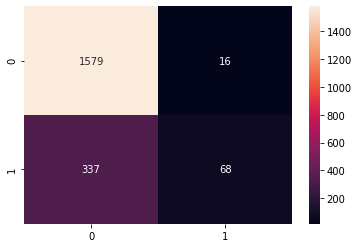

In [11]:
import seaborn as sns
# Predicting the test set results
# send the test data through the trained model
# ge the probability prediction
# determine if the value is less than or more than the cut off value
y_pred = classifier.predict(X_test)
# here the cut off value is 0.5
# if it is more than 0.5, then assigned 1 otherwise 0
#y_test has the actual class information which we will compare the predicted class information
y_pred = (y_pred > 0.65)
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='')


In [ ]:
# Tuning the DNN
# Copy and paste the library functions from the previous set of Code
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
# Copy and paste the user defined function build_classifier function that you created
# Inside the bracket type the argument as optimizer
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'orthogonal', activation = 'tanh', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'truncated_normal', activation = 'swish'))
    classifier.add(Dense(units = 1, kernel_initializer = 'orthogonal', activation = 'sigmoid'))
    # Replace adam by optimizer
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

# copy and paste - delete the other information regarding batch size and epoch
classifier = KerasClassifier(build_fn = build_classifier)

# Create parameter as adictionary. Batch size, epochs and optimizer are keys.
# Attached to the keys are values. This is driven by experience. Black Box!
# Create dictionary of keys and values
parameters = {'batch_size' : [20,32], 'epochs': [100,500], 'optimizer': ['adam','rmsprop','nadam']}

# Grid search object has to be created and data has to be fitten on it
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv  = 10)

# Fitting the data on the grid search object
grid_search = grid_search.fit(X_train, y_train)


# After training the neral network we want to identify the best aprameters.
# These are attributes best_params_ and best_score_
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
360/360 [==============================] - 1s 2ms/step - loss: 0.6113 - accuracy: 0.7528
Epoch 2/100
360/360 [==============================] - 1s 2ms/step - loss: 0.4148 - accuracy: 0.8136
Epoch 3/100
360/360 [==============================] - 1s 2ms/step - loss: 0.4242 - accuracy: 0.8135
Epoch 4/100
360/360 [==============================] - 1s 2ms/step - loss: 0.4182 - accuracy: 0.8180
Epoch 5/100
360/360 [==============================] - 1s 2ms/step - loss: 0.4178 - accuracy: 0.8166
Epoch 6/100
360/360 [==============================] - 1s 2ms/step - loss: 0.4177 - accuracy: 0.8225
Epoch 7/100
360/360 [==============================] - 1s 2ms/step - loss: 0.4056 - accuracy: 0.8328
Epoch 8/100
360/360 [==============================] - 1s 2ms/step - loss: 0.4050 - accuracy: 0.8329
Epoch 9/100
360/360 [==============================] - 1s 2ms/step - loss: 0.4036 - accuracy: 0.8261
Epoch 10/100
360/360 [==============================] - 1s 2ms/step - loss: 0.3913 - accura

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Streaming output truncated to the last 5000 lines.
Epoch 211/500
360/360 [==============================] - 1s 4ms/step - loss: 0.3336 - accuracy: 0.8666
Epoch 212/500
360/360 [==============================] - 1s 4ms/step - loss: 0.3195 - accuracy: 0.8709
Epoch 213/500
360/360 [==============================] - 1s 4ms/step - loss: 0.3331 - accuracy: 0.8673
Epoch 214/500
360/360 [==============================] - 1s 4ms/step - loss: 0.3320 - accuracy: 0.8647
Epoch 215/500
360/360 [==============================] - 1s 4ms/step - loss: 0.3229 - accuracy: 0.8747
Epoch 216/500
360/360 [==============================] - 2s 5ms/step - loss: 0.3277 - accuracy: 0.8680
Epoch 217/500
360/360 [==============================] - 2s 6ms/step - loss: 0.3308 - accuracy: 0.8664
Epoch 218/500
360/360 [==============================] - 2s 5ms/step - loss: 0.3246 - accuracy: 0.8714
Epoch 219/500
360/360 [==============================] - 1s 4ms/step - loss: 0.3316 - accuracy: 0.8687
Epoch 220/500
360/360 